<a href="https://colab.research.google.com/github/SaugataDeb/SaugataDeb-Airline_Passenger_Referral_Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

##**Data descriptions:**


*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.


*   **author**: Author of the trip


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format



*  **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)


*   **cabin**: Cabin at the flight date flown: Flight date

*  **seatcomfort**: Rated between 1-5


*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5


*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5





In [1]:
# Importing necessary libraries.
import pandas as pd 
import numpy as np
from datetime import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb 


In [2]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the xlsx file from the drive
df = pd.read_excel('/content/drive/MyDrive/Capstone Project 3/data_airline_reviews.xlsx')

In [5]:
df.head(15)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


#**EDA(Exploratory Data Analysis)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [7]:
#Counting number of duplicate values
df.duplicated().sum()

70711

In [8]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

* Here we can see that there are 61184 rows and 17 columns.Also we can see that there are 7 float type feature and 10 object type feature. 

In [10]:
# droping the rows which have all values as NaN
df.dropna(how='all',inplace=True)

In [11]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [12]:
df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

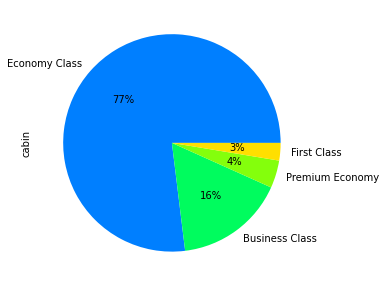

In [13]:
#pie chart to get percentage of class of passenger in cabin
sns.set_palette('gist_ncar')
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))

* From this we can see economy Class is having a largest percentage of overall share with 77%. This indicate that people travel most frequently on economic class followed by Business class then Premium class and small percentage of people fly on first class.

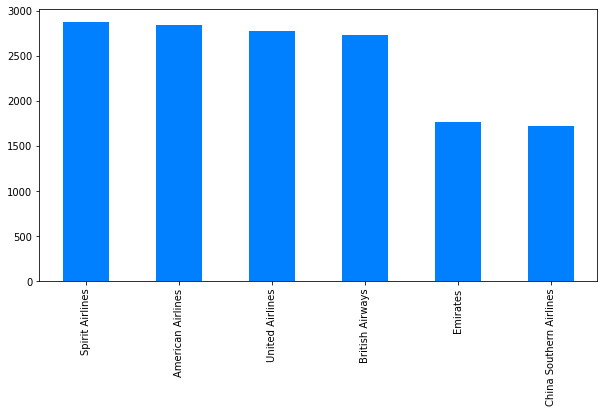

In [14]:
# Visualize the top 6 most frequently used airlines
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
df['airline'].value_counts()[0:6].plot(kind='bar',figsize=(10,5))

* From the Bar graph we can conclude that Spirit Airways is the most frequently used airlines with a total count of around 2800 according to the dataset given

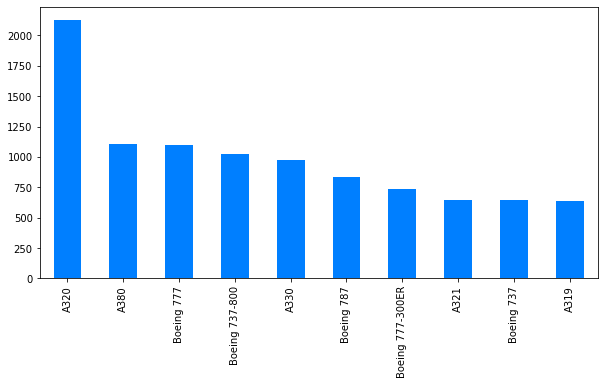

In [15]:
#using bar plot to get most frequent aircraft
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
df['aircraft'].value_counts()[0:10].plot(kind='bar',figsize=(10,5))

* From this bar graph we can see that **aircraft A320** has travelled most frequently and also been used by most of the people.

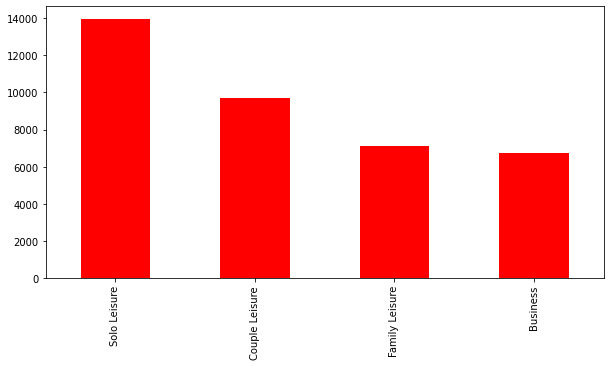

In [16]:
#using bar plot to get traveller type class with their count
plt.figure(figsize=(10,5))
df['traveller_type'].value_counts().plot(kind='bar', color ='r')

We can see there are 4 classes present in Traveller type feature. Also we can notice that Solo Leisure has highest value count. From this we can conclude that most of people who travel through airline travels in solo. Followed by College then Family. Very small percentage of people prefer flying for business. 

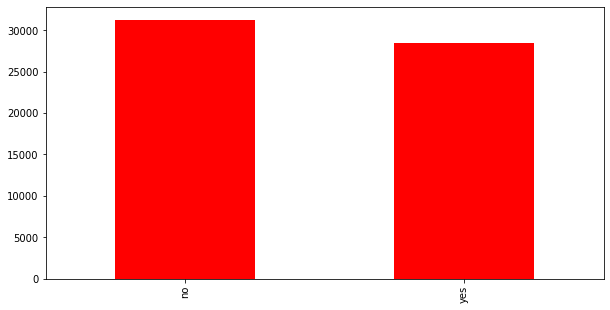

In [17]:
#Plotting bar graph to identify classes of dependent variable
plt.figure(figsize=(10,5))
df['recommended'].value_counts()[0:10].plot(kind='bar', color ='r')

* Here we can see that Dependent feature recommended has balanced data in its classes **Yes** and **No**.

In [18]:

# Changing the 'date_flown' column from str to datetime type
df['date_flown'] = df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [19]:
#creating new feature to store month

df['travel_month'] = df['date_flown'].dt.month

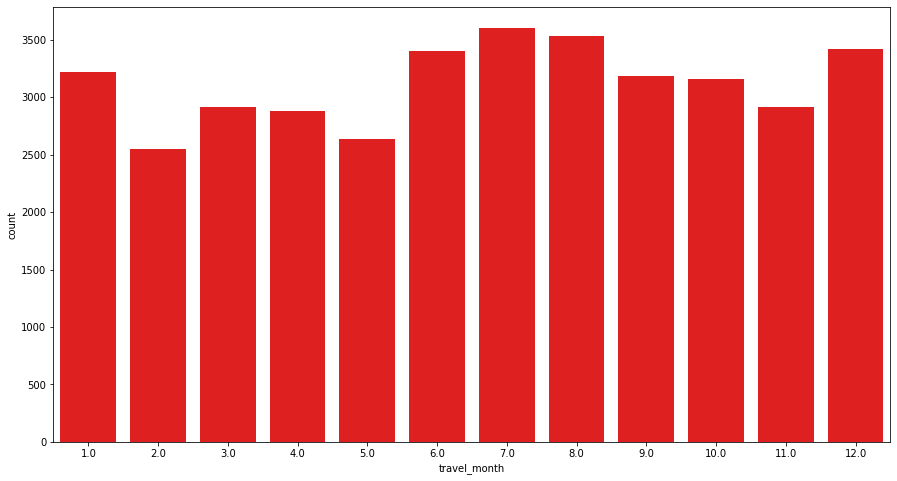

In [20]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(15,8))
sns.countplot(df['travel_month'], color ='r')

* Here we can see that people flown most fequently in the month of July and least frequently in month of february.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  seat_comfort     56211 non-null  float64       
 11  cabin_service    56240 non-null  float64       
 12  food_bev         48341 non-null  float64       
 13  entertainment    40230 non-null  float64       
 14  ground_service   37169 non-null  floa

##**Feature descriptions briefly as follows:**


*   **airline**: Name of the airline in str fromat

*   **overall**: Overall point is given to the trip between 1 to 10 in float format.


*   **author**: Author of the trip in str format


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format in str need to be converted into DateTime Format



*  **aircraft**: Type of the aircraft in str format

*   **travellertype**: Type of traveler (e.g. business, leisure) consist of four class in str format 


*   **cabin**: Cabin at the flight date flown: Flight date in str format consist of 4 class.

*  **seatcomfort**: Rated between 1-5 in float format


*   **cabin service**: Rated between 1-5 float format

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5 in float format


*   **groundservice**: Rated between 1-5 in float format

*   **valueformoney**: Rated between 1-5 in float format





##**Feature Engineering**

In [22]:
numerical_df = df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [23]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

In [24]:
numerical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [25]:
df = df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 7.6+ MB


In [27]:
df = pd.concat([df.reset_index(),numerical_df.reset_index()], axis =1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [29]:
df = df.select_dtypes(include=['object','float64'])


In [30]:
df

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,yes,5.0,7.000000,4.000000,5.000000,4.000000,4.000000,2.000000,4.000000
1,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,no,5.0,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,no,5.0,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,2.000000
3,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,yes,4.0,10.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,no,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,no,NaN,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,no,NaN,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,no,NaN,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,no,NaN,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849


Numerical data features are filled with appropriate values

In [31]:
df= round(df)

In [32]:
df.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0


In [33]:
# replacing yes =1 and no =0 in recommended column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [34]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.791971,0.820029,0.803981,0.740649,0.881449,0.896356
seat_comfort,0.719521,0.000088,0.791971,1.000000,0.708728,0.725471,0.708497,0.719685,0.758560
cabin_service,0.756843,-0.005573,0.820029,0.708728,1.000000,0.776758,0.666898,0.747785,0.764541
food_bev,0.736565,-0.002793,0.803981,0.725471,0.776758,1.000000,0.729318,0.716689,0.763086
entertainment,0.668660,-0.015751,0.740649,0.708497,0.666898,0.729318,1.000000,0.671103,0.706957
ground_service,0.797478,-0.004096,0.881449,0.719685,0.747785,0.716689,0.671103,1.000000,0.822223
value_for_money,0.837220,-0.007617,0.896356,0.758560,0.764541,0.763086,0.706957,0.822223,1.000000


In [35]:
# Features present in dataset
features= df.columns
features

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended', 'travel_month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [36]:
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

traveller_type


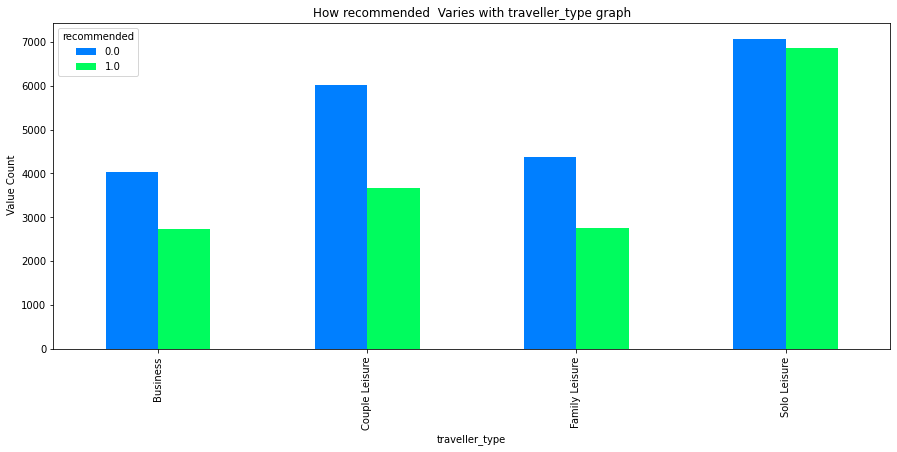

cabin


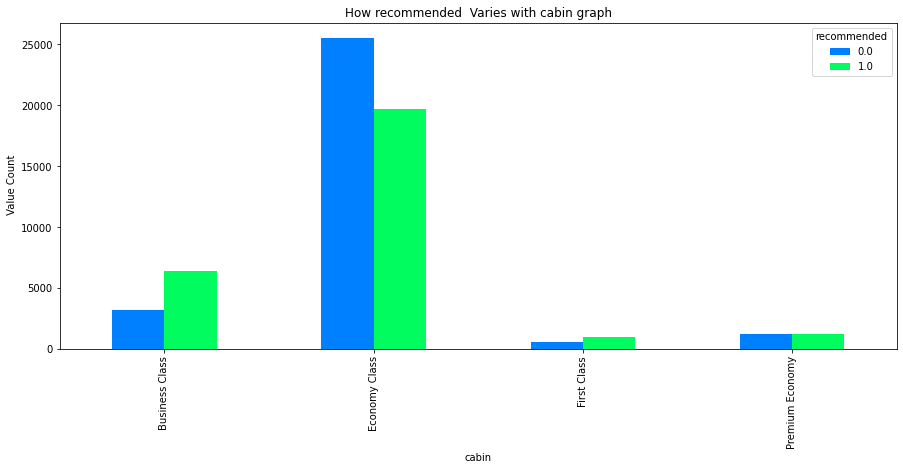

travel_month


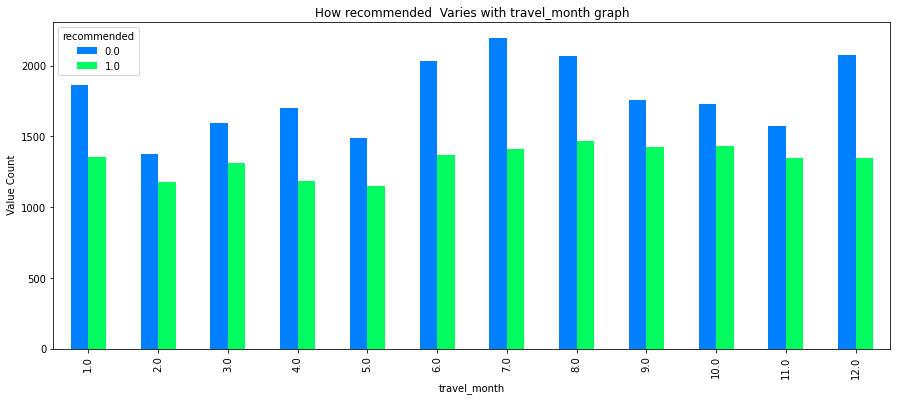

overall


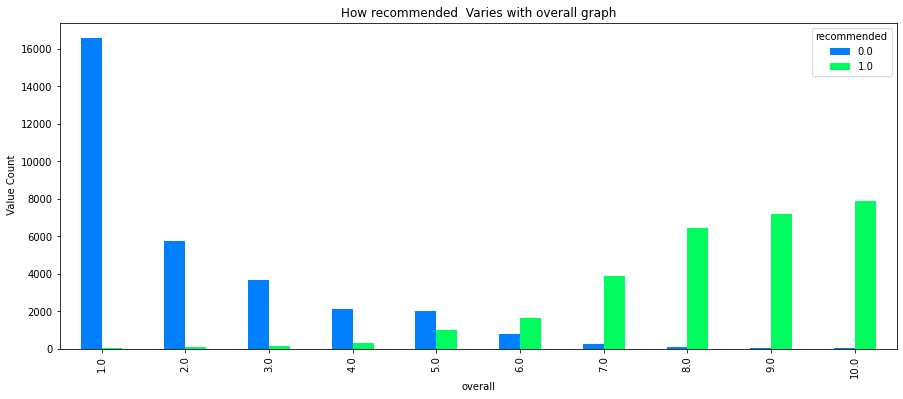

seat_comfort


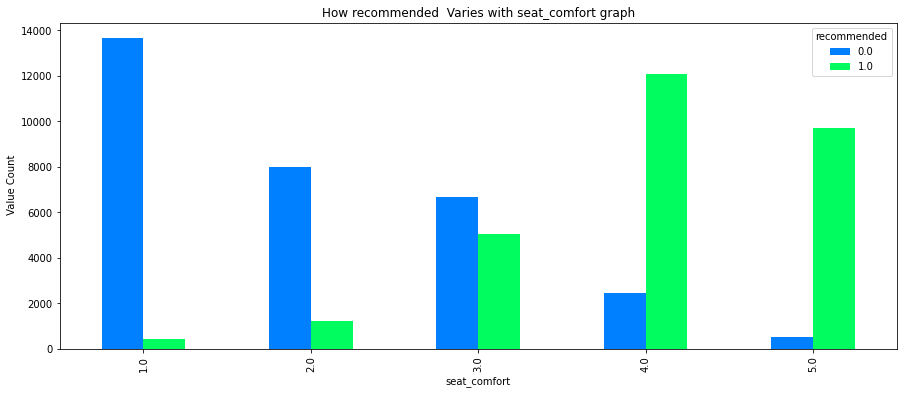

cabin_service


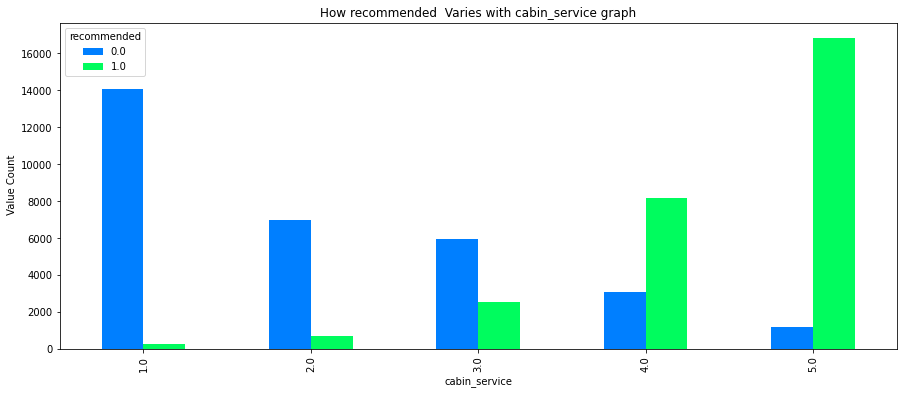

food_bev


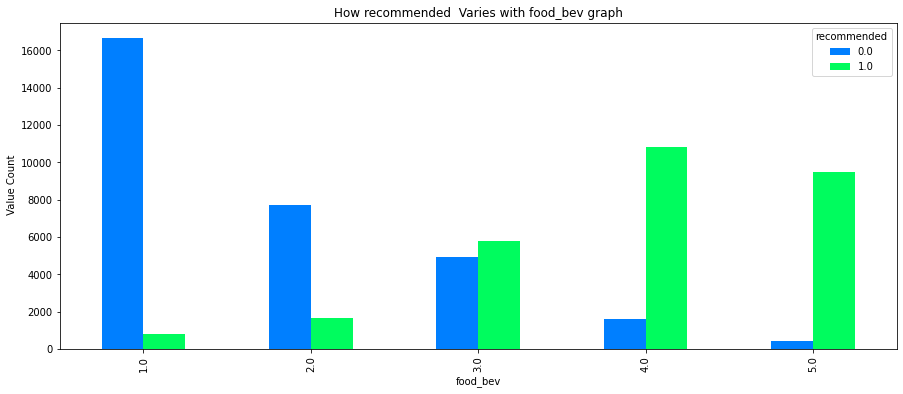

entertainment


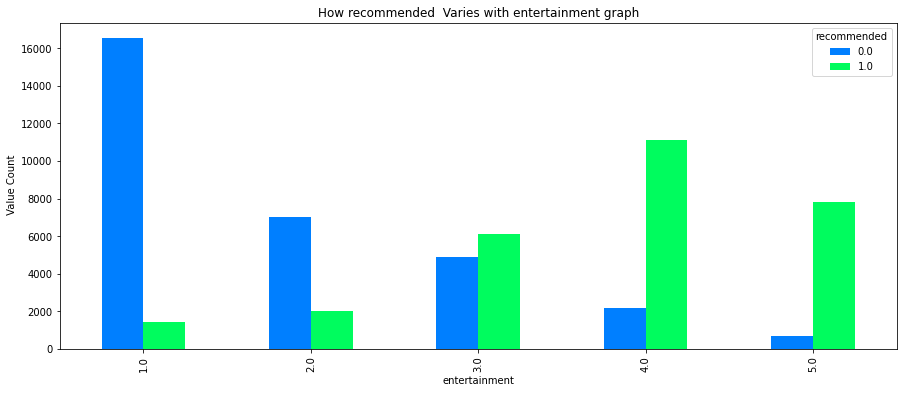

ground_service


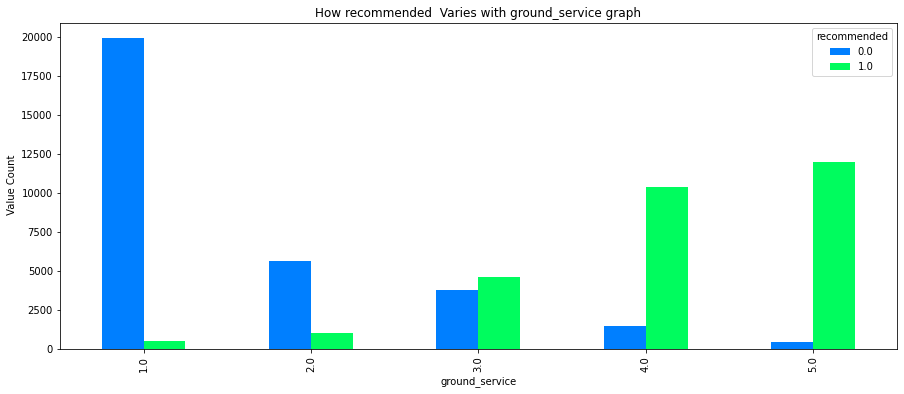

value_for_money


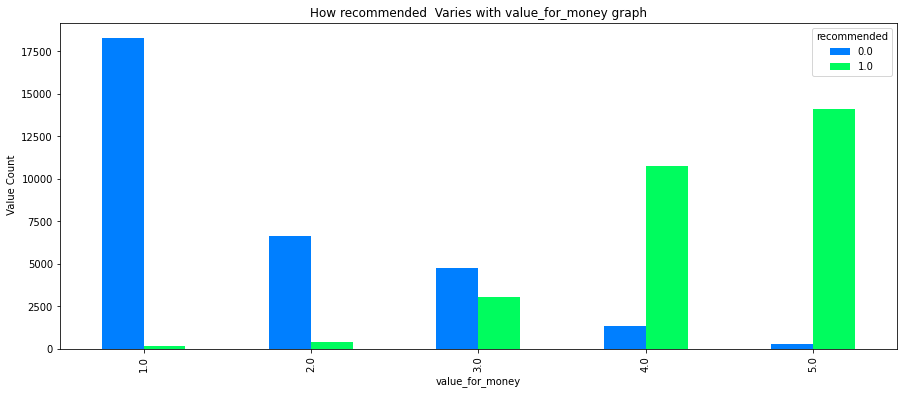

In [38]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

* We can conclude following things from above:
  * We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
  * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
  * From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
  * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
  * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
  * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
  * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
  * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows  that airline has to improve their entertainment system as well.
  * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows  that airline has to improve their ground service.
  * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows  that airline has to make their flight service more cost effective.

traveller_type


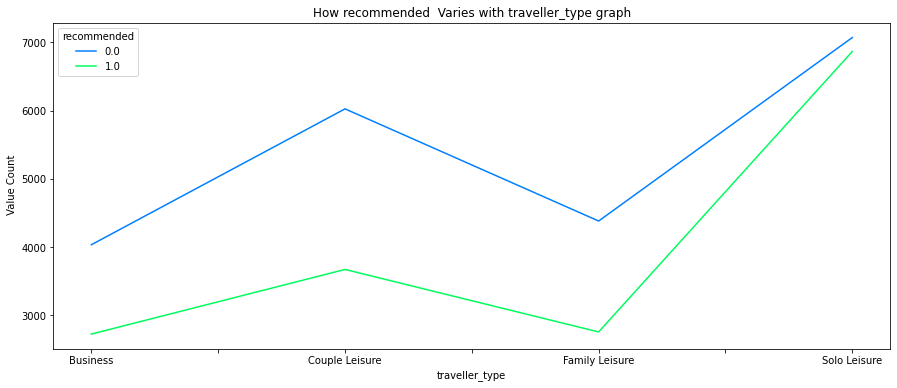

cabin


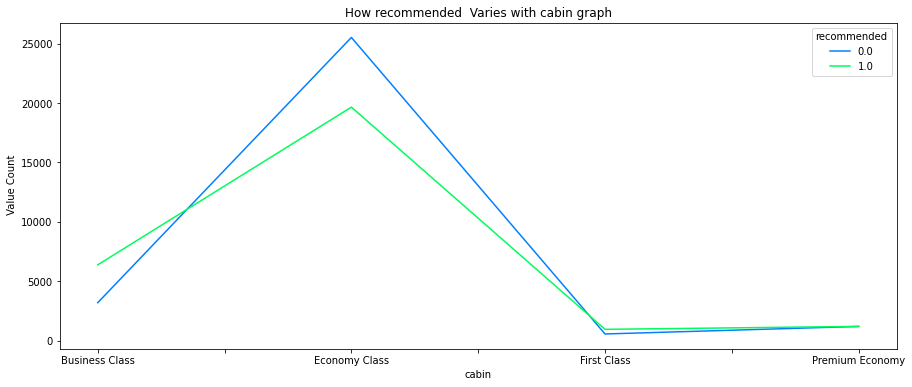

travel_month


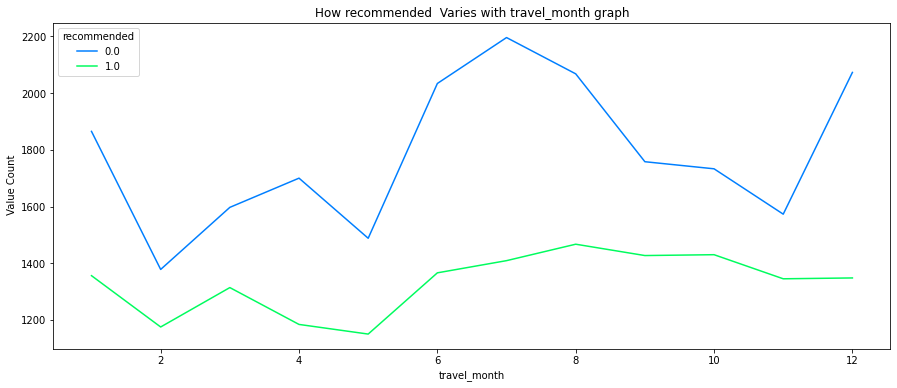

overall


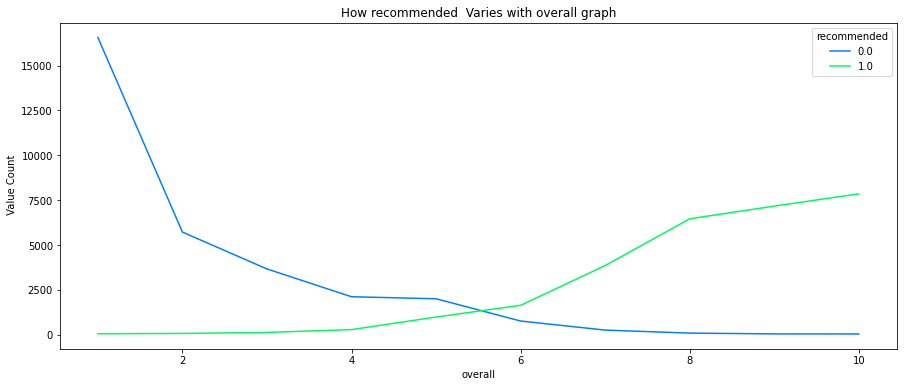

seat_comfort


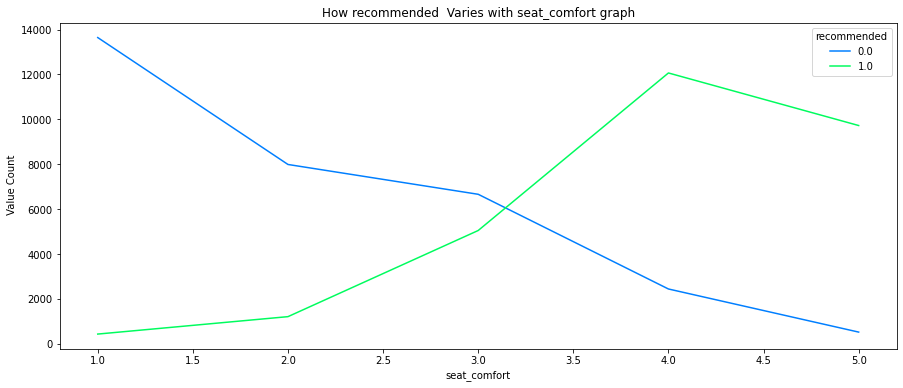

cabin_service


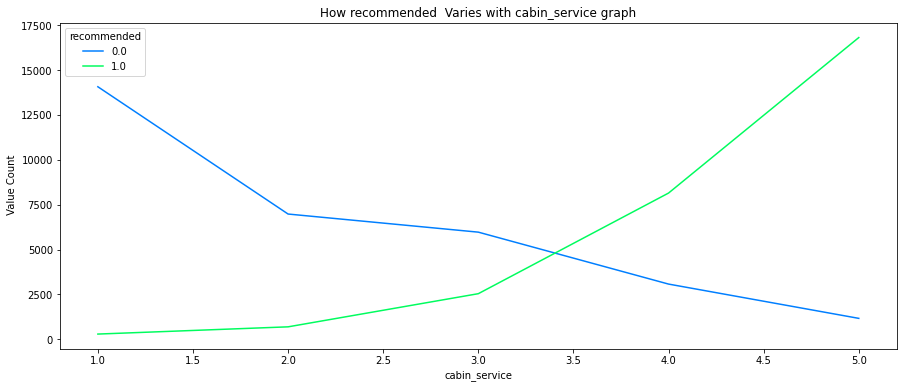

food_bev


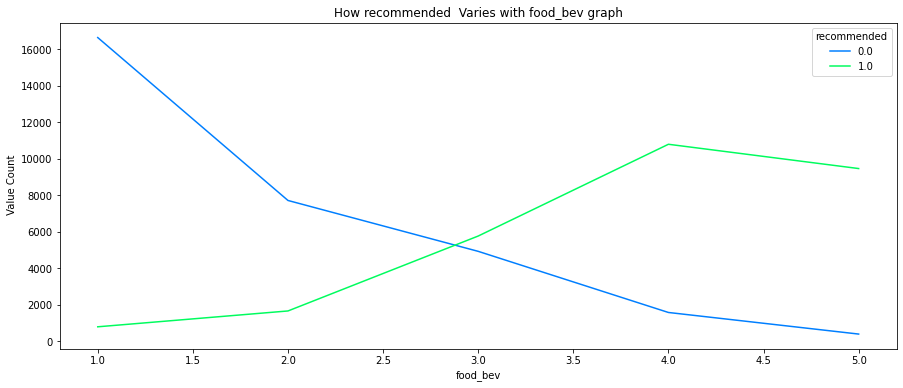

entertainment


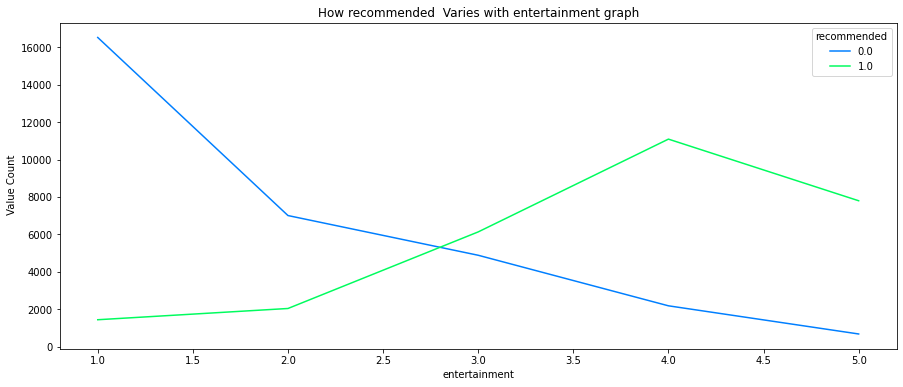

ground_service


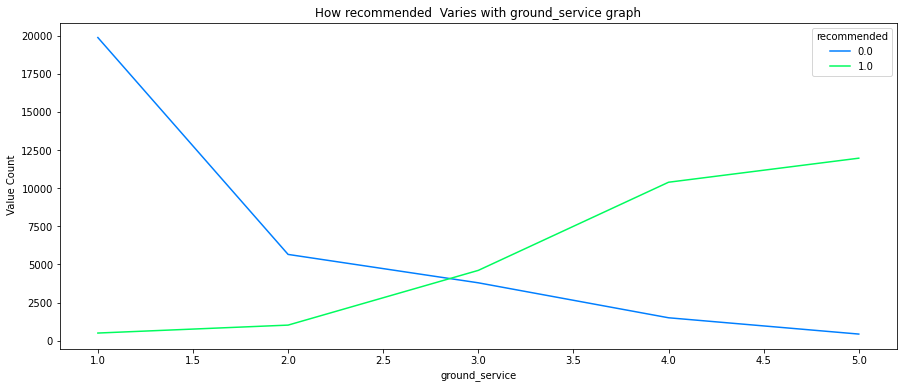

value_for_money


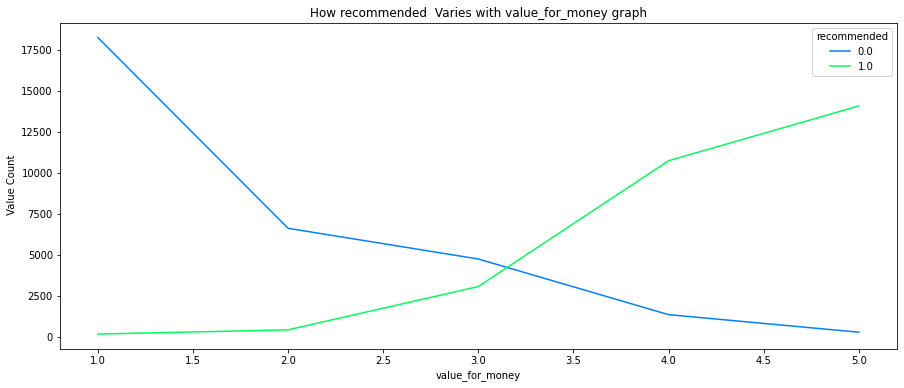

In [39]:
#Ploting line graph of count of feature grouped by target variable to analyze the trend
for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

* In Traveller type we can see that both the recommendation trend as of yes or no increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.
* In Cabin type we can see that both the recommendation trend as of yes or no increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which indicate most people travel on economy class.
* In month we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July.
* In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases. 
* In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.
* In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
* In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.
* In Entertainment service too we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.
* In Ground service also we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where we can see similar positive and negative recommendation.
* Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.


In [ ]:
#checking the  null value if exist
df.recommended.isna().sum()

1422

In [ ]:
df.head(15)

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,1.0,5.0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,0.0,5.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,0.0,5.0,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,1.0,4.0,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,Turkish Airlines,M Shaw,5th May 2019,âœ… Trip Verified | Istanbul to Budapest via D...,NaN,Couple Leisure,Economy Class,Istanbul to Budapest via Dublin,0.0,5.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0
6,Turkish Airlines,J Dalwen,2nd May 2019,"âœ… Trip Verified | Istanbul to Algiers, plann...",NaN,Business,Business Class,Istanbul to Algiers,0.0,4.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0
7,Turkish Airlines,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,0.0,4.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0
8,Turkish Airlines,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,1.0,4.0,6.0,2.0,3.0,3.0,3.0,3.0,3.0
9,Turkish Airlines,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#dropping redundant feature which are not required 
df.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.6+ MB


In [ ]:
df = df[df['recommended'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


#**NLP(Natural Language Processing) for reviews**

In [ ]:
# Install vaderSentiment package
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing SentimentIntensityAnalyzer class

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# creating numeric review column to store polarity for each customer review
df['numeric_review']= df['customer_review'].apply(sentiment_scores)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
 12  numeric_review   59761 non-null  float64
dtypes: float64(9), object(4)
memory usage: 6.4+ MB


In [ ]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,recommended,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,numeric_review
recommended,1.000000,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220,0.699408
overall,0.898390,1.000000,0.789117,0.816663,0.802788,0.739857,0.879980,0.894839,0.725893
seat_comfort,0.719521,0.789117,1.000000,0.704709,0.725061,0.708971,0.714992,0.755456,0.593969
cabin_service,0.756843,0.816663,0.704709,1.000000,0.775825,0.665273,0.744625,0.760315,0.631408
food_bev,0.736565,0.802788,0.725061,0.775825,1.000000,0.728276,0.714309,0.761662,0.608310
entertainment,0.668660,0.739857,0.708971,0.665273,0.728276,1.000000,0.670868,0.706048,0.554105
ground_service,0.797478,0.879980,0.714992,0.744625,0.714309,0.670868,1.000000,0.820215,0.661630
value_for_money,0.837220,0.894839,0.755456,0.760315,0.761662,0.706048,0.820215,1.000000,0.671077
numeric_review,0.699408,0.725893,0.593969,0.631408,0.608310,0.554105,0.661630,0.671077,1.000000


In [ ]:
#Dropping customer review to replace with numeric review.
df.drop('customer_review' , axis =1, inplace =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   traveller_type   37539 non-null  object 
 2   cabin            58704 non-null  object 
 3   recommended      59761 non-null  float64
 4   overall          59761 non-null  float64
 5   seat_comfort     59761 non-null  float64
 6   cabin_service    59761 non-null  float64
 7   food_bev         59761 non-null  float64
 8   entertainment    59761 non-null  float64
 9   ground_service   59761 non-null  float64
 10  value_for_money  59761 non-null  float64
 11  numeric_review   59761 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


##**One Hot encoding for categorical features**

In [ ]:

# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']

In [ ]:
dummy= pd.get_dummies(df,columns=categorical_columns , drop_first = False)

In [ ]:
dummy.columns

Index(['recommended', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

##**Splitting the Data to Train and Test**

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split

In [ ]:
#getting the independent variables
X = dummy.drop('recommended', axis =1)

#getting the dependent variables
y= dummy['recommended']

In [ ]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [ ]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47808, 97), (11953, 97), (47808,), (11953,))

In [ ]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)


###**Creating Function to store evaluation metrics values**

In [ ]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

##**Logistic Regression**

In [ ]:
#logistic regression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.9564126160796452


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.64%



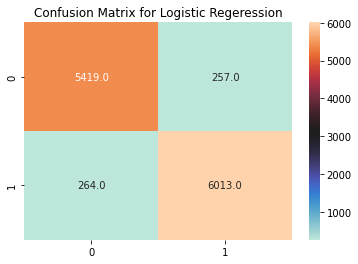

In [ ]:
#model evaluation
pred_value = lr.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)

##**Decision Tree**

In [ ]:
#Decision Tree
dtc =DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')

Decision Tree score : 0.9363339747343763


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      6277
         1.0       0.93      0.94      0.93      5676

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953


Accuracy score % of the model is 93.63%



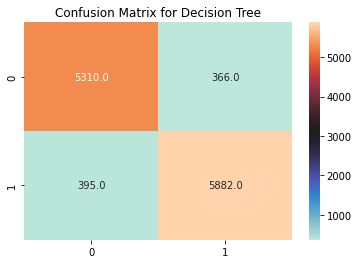

In [ ]:
#model evaluation
pred_value = dtc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Decision Tree')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Decision Tree',y_test,pred_value,evaluation_metrics_df)

##**Random Forest**

In [ ]:
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
score=rf.score(X_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.9570819041244876


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.71%



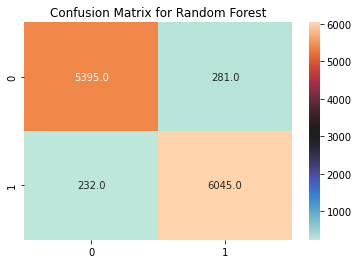

In [ ]:
pred_value = rf.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest',y_test,pred_value,evaluation_metrics_df)

##**Random Forest with GridSearchCV**

In [ ]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [ ]:
#uassigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=12, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=80)

In [ ]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 80}

In [ ]:
#assigning best param variable
rf_grid_best = rf_grid.best_estimator_

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.55%



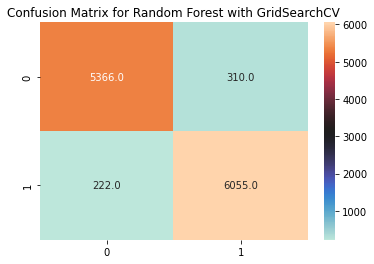

In [ ]:
#model evaluation
pred_value = rf_grid_best.predict(X_test)


print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

##**Support Vector Machine**

In [ ]:
#supprt vector machine using kernel as linear
svc= SVC(kernel = 'linear')
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print(f'SVM score : {score}')

SVM score : 0.9568309211076718


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.68%



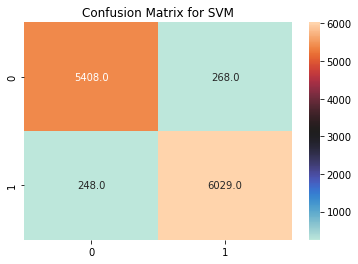

In [ ]:
#model evaluation
pred_value = svc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for SVM')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('SVM',y_test,pred_value,evaluation_metrics_df)

##**K_nearest Neighbour Model**

In [ ]:
#using knn model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'K-nearest-neighbour score : {score}')

K-nearest-neighbour score : 0.9538191249058814


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.38%



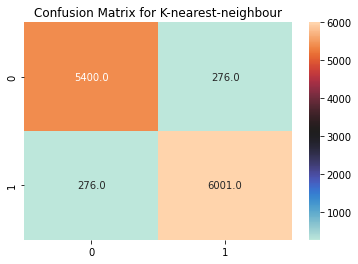

In [ ]:
#model evaluation
pred_value = knn.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour',y_test,pred_value,evaluation_metrics_df)

##**K_nearest Neighbour Model with GridSearchCV**

In [ ]:
#hyperparametric tuning to get best estimator for knn
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [ ]:
#getting best estimator
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=42)

In [ ]:
#assigining grid variable
knn_grid_best = knn_grid.best_estimator_

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.58%



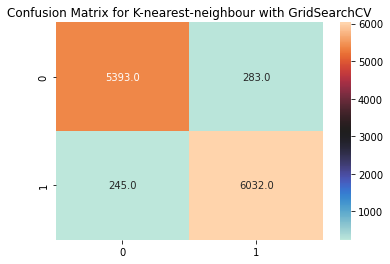

In [ ]:
#model evaluation
pred_value = knn_grid_best.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour with GridSearchCV')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

##**XGBoost Model**

In [ ]:
import xgboost as xgb

#xgboost model
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
score=xgb_model.score(X_test,y_test)
print(f'XGBoost score : {score}')

XGBoost score : 0.9570819041244876


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.71%



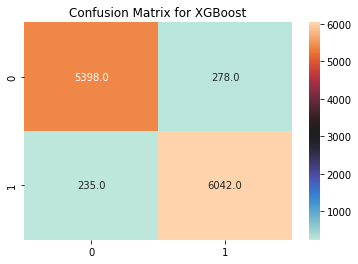

In [ ]:
#model evaluation
pred_value = xgb_model.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for XGBoost')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('XGBoost',y_test,pred_value,evaluation_metrics_df)

##**Different Model Comparison according to their Evaluation metrices**

In [ ]:
#getting evaluation metrices
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score
0,Logistic Regression,0.956413,0.954722,0.953546,0.954133,0.956332
1,Decision Tree,0.936334,0.935518,0.930762,0.933134,0.936295
2,Random Forest,0.957082,0.950493,0.958770,0.954614,0.956766
3,Random Forest with GridSearchCV,0.955492,0.945384,0.960272,0.952770,0.955008
4,SVM,0.956831,0.952784,0.956153,0.954465,0.956637
5,K-nearest-neighbour,0.953819,0.951374,0.951374,0.951374,0.953702
6,K-nearest-neighbour,0.955827,0.950141,0.956545,0.953332,0.955555
7,XGBoost,0.957082,0.951022,0.958282,0.954638,0.956792
8,K-nearest-neighbour with GridSearchCV,0.955827,0.950141,0.956545,0.953332,0.955555


In [ ]:
#reseting index so to have all the model's evaluation metrices starting from 0
evaluation_metrics_df.sort_values('Accuracy',ascending=False)
evaluation_metrics_df=evaluation_metrics_df.reset_index(drop=True)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score
0,Logistic Regression,0.956413,0.954722,0.953546,0.954133,0.956332
1,Decision Tree,0.936334,0.935518,0.930762,0.933134,0.936295
2,Random Forest,0.957082,0.950493,0.958770,0.954614,0.956766
3,Random Forest with GridSearchCV,0.955492,0.945384,0.960272,0.952770,0.955008
4,SVM,0.956831,0.952784,0.956153,0.954465,0.956637
5,K-nearest-neighbour,0.953819,0.951374,0.951374,0.951374,0.953702
6,K-nearest-neighbour,0.955827,0.950141,0.956545,0.953332,0.955555
7,XGBoost,0.957082,0.951022,0.958282,0.954638,0.956792
8,K-nearest-neighbour with GridSearchCV,0.955827,0.950141,0.956545,0.953332,0.955555


* Here we can see that Random Forest and XGBoost Model is having the same high Model Accuracy with a score 0.957082 but we can also see that recall, precision, f1-score and roc_auc_score of XGBoost model combined is giving higher score than Random Forest from which we have chosen XGBoost Model for further prediction.

#**Model explainability**
##**SHAP(SHapley Additive exPlanations)**

**SHAP Interpretation**
* **Base value**: This is the average feature value. This value is used to determine if the prediction is whether true or false.
* **Red color Block**: This represent the feature for which the prediction is positive. Higher this value will pushes the prediction positively.
* **Blue color block**: This represent the feature for which the prediction is negative. higher this value will pushes the prediction negatively 
* **Block size**: the block size shows the feature importance. larger the block size larger will the feature importance value.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Creating function for getting shape OF tree based model with JS visualization using SHAP in notebook environment**

In [ ]:
import shap
# Initialize JavaScript visualizations in notebook environment
def get_shap_js(model):
  shap.initjs()
# Define a tree explainer for the built model
  explainer = shap.TreeExplainer(dtc)
# obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

##**Creating Function to get SHAP summary**

In [ ]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values[0], X_test)

In [ ]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)  
  return shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
X_test.iloc[0]

overall                          1.0
seat_comfort                     4.0
cabin_service                    2.0
food_bev                         3.0
entertainment                    3.0
                                ... 
cabin_Premium Economy            0.0
traveller_type_Business          0.0
traveller_type_Couple Leisure    0.0
traveller_type_Family Leisure    1.0
traveller_type_Solo Leisure      0.0
Name: 43190, Length: 97, dtype: float64

In [ ]:
X_test.mean()

overall                          5.073956
seat_comfort                     2.970802
cabin_service                    3.179369
food_bev                         2.789844
entertainment                    2.745838
                                   ...   
cabin_Premium Economy            0.041078
traveller_type_Business          0.109680
traveller_type_Couple Leisure    0.159960
traveller_type_Family Leisure    0.119301
traveller_type_Solo Leisure      0.233665
Length: 97, dtype: float64

##**Shap Summary for Logistic Regresion**

In [ ]:
get_shap_js(lr)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

##**Shap Summary for Decision Tree**

In [ ]:
get_shap_js(dtc)


* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

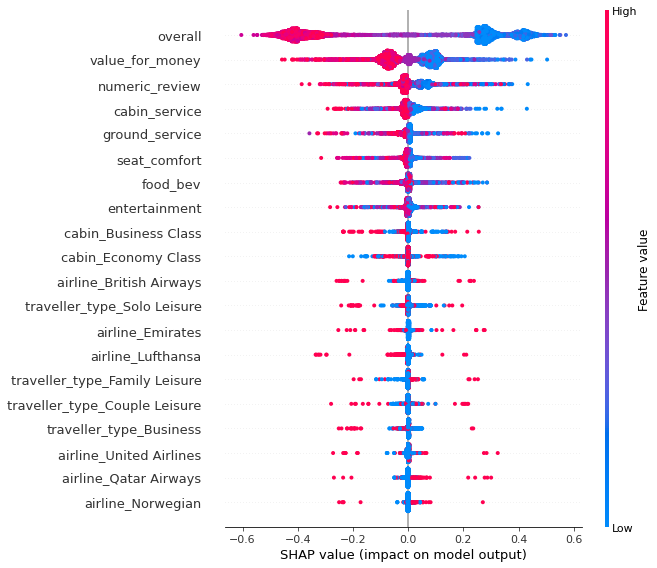

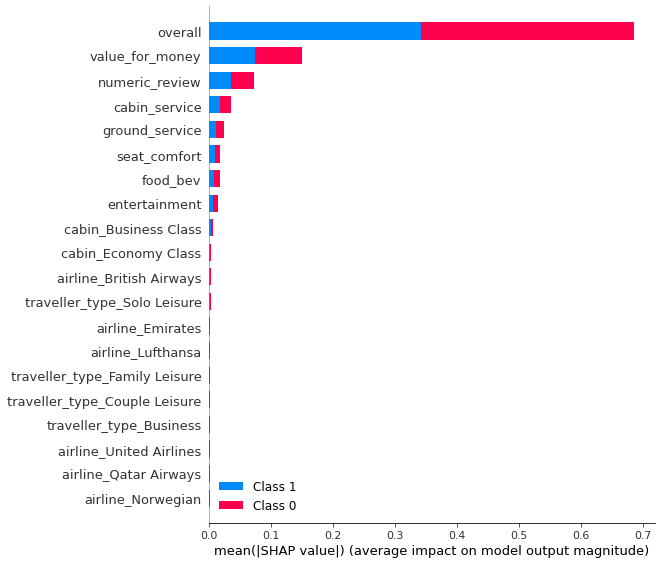

In [ ]:
shap_scatter_plot(dtc)
shap_bar_plot(dtc)

* Here we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction.

##**Shap Summary for SVM**

In [ ]:
get_shap_js(svc)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

##**Shap Summary for Random Forest**

In [ ]:
get_shap_js(rf_grid_best)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

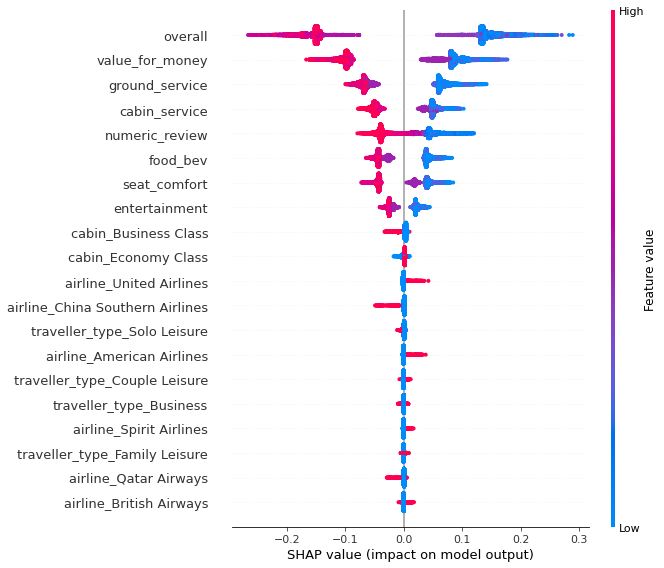

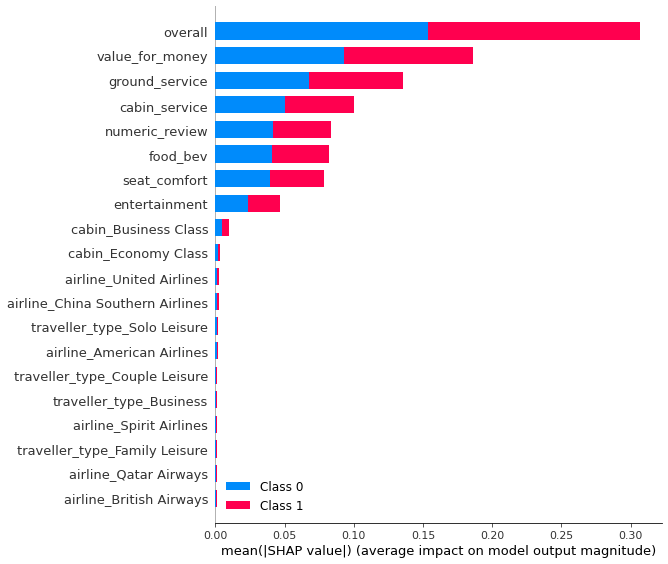

In [ ]:
shap_scatter_plot(rf_grid_best)
shap_bar_plot(rf_grid_best)

* Here we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction.

##**Shap Summary for K-Nearest-Neighbour**

In [ ]:
get_shap_js(knn_grid_best)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

##**Conclusion**

* We can conclude following things from above:
  * We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
  * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
  * From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
  * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
  * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
  * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
  * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
  * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows  that airline has to improve their entertainment system as well.
  * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows  that airline has to improve their ground service.
  * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows  that airline has to make their flight service more cost effective.
  * In model Selection we can see that Random Forest and XGBoost Model is having the same high Model Accuracy with a score 0.957082 but we can also see that recall, precision, f1-score and roc_auc_score of XGBoost model combined is giving higher score than Random Forest from which we have chosen XGBoost Model for further prediction.
  * In Shap JS summary we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive model prediction and it is common for all model.
  * In Shap summary scatter plot we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction and it is common for all models. Also we can see that overall,value for money,numeric_review,cabin service,ground_service has high shap feature value.  